In [3]:
# 画图和防止中文乱码、显示数量设置
# 画图工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:\windows\fonts\MicroSoft YaHei.ttc", size=12)
# %matplotlib inline 
# auto 弹出窗口 inline 默认，在当前页显示
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

import math
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import matplotlib as mpl
from ipywidgets import widgets,Button,Label

warnings.filterwarnings('ignore')

large=22;med=16;small=12;
params={'axes.titlesize':large,
        'legend.fontsize':med,
        'figure.figsize':(16,10),
        'axes.labelsize':med,
        'axes.titlesize':med,
        'xtick.labelsize':med,
        'ytick.labelsize':med,
        'figure.titlesize':large}
plt.rcParams.update(params)


In [4]:
from scipy import stats
from scipy.stats import norm

#  插值 (scipy.interpolate )

1.1 一维插值

In [4]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

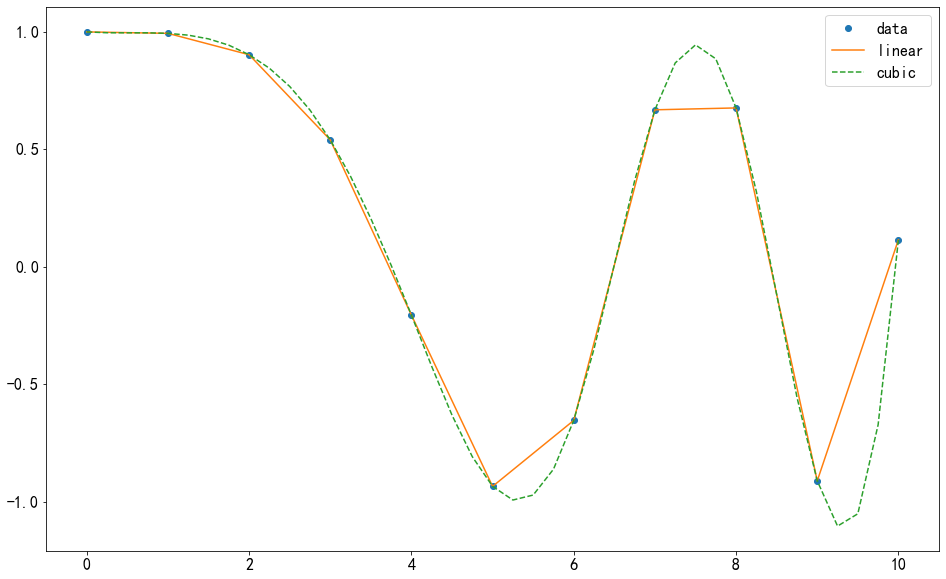

In [5]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

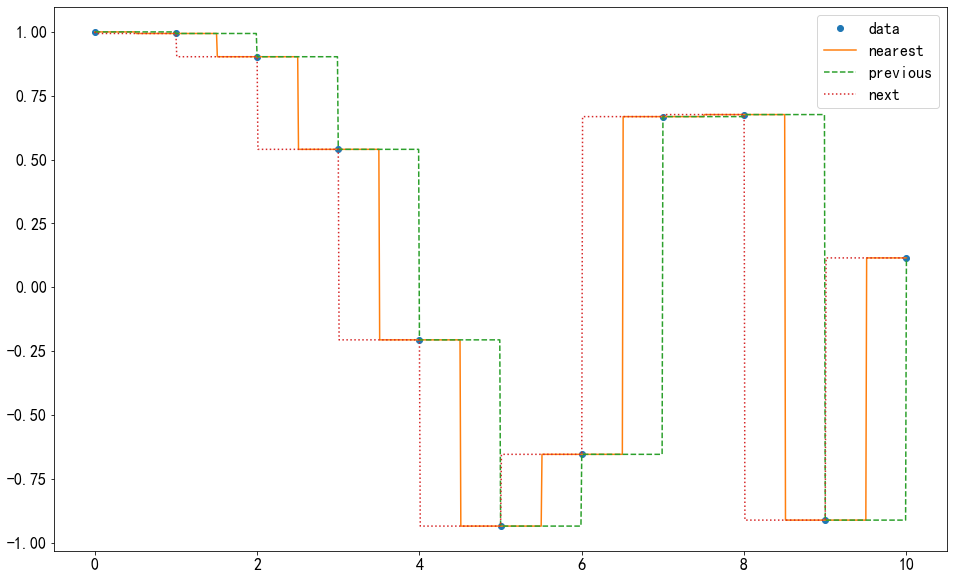

In [22]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

xnew = np.linspace(0, 10, num=1001, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

2、多元数据插值 (griddata )

3、一维样条插值：程序化（interpolate.splXXX）<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;二维样条表示：程序 (bisplrep ) 

第四部分 统计

rvs：随机变量

pdf: 概率密度函数

cdf：累积分布函数

SF：生存函数（1-CDF）

ppf：百分比点函数（CDF 的倒数）

isf：逆生存函数（SF的逆）

统计：返回均值、方差、（Fisher 的）偏斜或（Fisher 的）峰度

矩：分布的非中心矩

In [37]:
#随机数生成

rng=np.random.default_rng()
rng.integers(low=0,high=10,size=5)
rng.poisson(1,6)

array([1, 1, 4, 0, 2, 1], dtype=int64)

In [42]:
norm.stats(loc=3,scale=4,moments='mv') # loc 为均值，scale 为标准差，移动了


(array(3.), array(16.))

In [44]:
from scipy.stats import expon  # 导入指数分布
expon.mean(scale=3)

3.0

In [52]:
# 伽马分布
from scipy.stats import gamma
gamma.shapes

'a'

核密度估计

统计学中的一项常见任务是从一组数据样本中估计随机变量的概率密度函数 (PDF)。此任务称为密度估计。

最知名的工具是直方图。直方图是一种有用的可视化工具（主要是因为每个人都理解它），但不能非常有效地使用可用数据。核密度估计 (KDE) 是执行相同任务的更有效工具。该 gaussian_kde估计可以用来估计单变量的PDF以及多变量数据。如果数据是单峰的，则效果最佳。

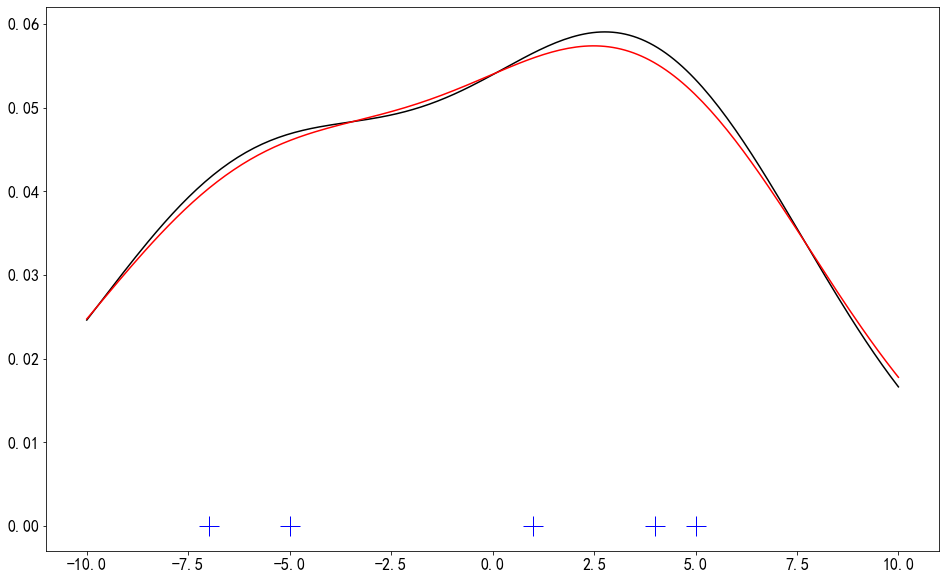

In [54]:
#  单变量估计
x1 = np.array([-7, -5, 1, 4, 5], dtype=np.float64)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot
x_eval = np.linspace(-10, 10, num=200)
ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'r-', label="Silverman's Rule")

plt.show()

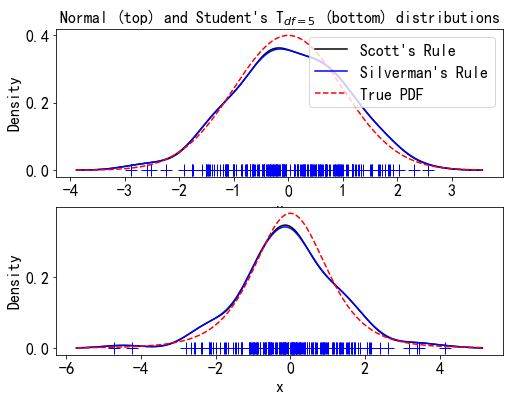

In [55]:
rng = np.random.default_rng()
x1 = rng.normal(size=200)  # random data, normal distribution
xs = np.linspace(x1.min()-1, x1.max()+1, 200)

kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(211)
ax1.plot(x1, np.zeros(x1.shape), 'b+', ms=12)  # rug plot
ax1.plot(xs, kde1(xs), 'k-', label="Scott's Rule")
ax1.plot(xs, kde2(xs), 'b-', label="Silverman's Rule")
ax1.plot(xs, stats.norm.pdf(xs), 'r--', label="True PDF")

ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title("Normal (top) and Student's T$_{df=5}$ (bottom) distributions")
ax1.legend(loc=1)

x2 = stats.t.rvs(5, size=200, random_state=rng)  # random data, T distribution
xs = np.linspace(x2.min() - 1, x2.max() + 1, 200)

kde3 = stats.gaussian_kde(x2)
kde4 = stats.gaussian_kde(x2, bw_method='silverman')

ax2 = fig.add_subplot(212)
ax2.plot(x2, np.zeros(x2.shape), 'b+', ms=12)  # rug plot
ax2.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax2.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax2.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")

ax2.set_xlabel('x')
ax2.set_ylabel('Density')

plt.show()

下面这段代码执行的任务是什么？用什么实现的？

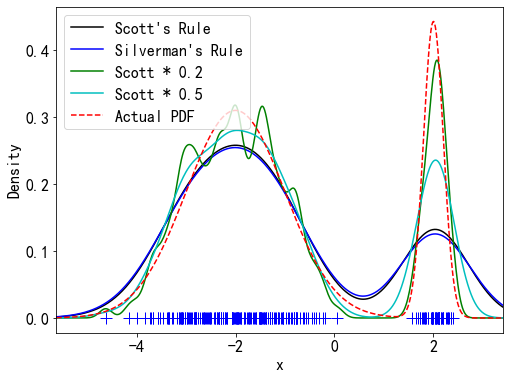

In [57]:
from functools import partial

def my_kde_bandwidth(obj, fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac

loc1, scale1, size1 = (-2, 1, 175)
loc2, scale2, size2 = (2, 0.2, 50)
x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1),
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])

x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)

kde = stats.gaussian_kde(x2)
kde2 = stats.gaussian_kde(x2, bw_method='silverman')
kde3 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.2))
kde4 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.5))

pdf = stats.norm.pdf
bimodal_pdf = pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size + \
              pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x2, np.zeros(x2.shape), 'b+', ms=12)
ax.plot(x_eval, kde(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'b-', label="Silverman's Rule")
ax.plot(x_eval, kde3(x_eval), 'g-', label="Scott * 0.2")
ax.plot(x_eval, kde4(x_eval), 'c-', label="Scott * 0.5")
ax.plot(x_eval, bimodal_pdf, 'r--', label="Actual PDF")

ax.set_xlim([x_eval.min(), x_eval.max()])
ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('Density')
plt.show()

## 第五部分 傅里叶转换

公式

$y[k]=\sum_k^N{x}$

In [7]:
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y
# yinv = ifft(y)
# yinv

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [11]:
1+np.exp(-2j*np.pi/5)*2+np.exp(-2j*np.pi*2/5)*1+np.exp(-2j*np.pi*3/5)*-1+np.exp(-2j*np.pi*4/5)*1.5

(2.0815594803123156-1.6510987627325227j)

## 第六部分 离散数据统计


### 6.1 通用函数
PMF 概率质量函数:$p(x_k)=P[X=X_{k}]$ ,  $f=\sum_{k=0}^\infty{p(x_k)}\delta(x-x_k)$ <br>
CDF 累计分布函数 $F(x)=P[X\le{x}]=\sum_{x_k\le{x}}p(x_k)$,$F(x_k)-F(x_{k-1})=p(x_k)$  <br>
生存函数  $S(x)=1-F(x)=P[X>k]$,随机变量严格大于的概率$k$ <br>
百分比点函数 逆CDF ：$G(q)=F^{-1}(q)$, ，这必须在没有的情况下进行修改$x_k$以至于$F(x_k)=q$在这些情况下，我们选择$G(q)$成为最小值  为此$x_k=G(q)$. 如果 然后我们定义 . 此定义允许以与连续 rv 相同的方式定义随机变量，使用均匀分布上的逆 cdf 来生成随机变量 <br>
逆生存函数  $Z(\alpha)=S^{-1}(\alpha)=G(1-\alpha)$,也就是最小的$k$使$F(k)>1-\alpha$  <br>
危险函数和累计危险函数  $h(x_k)={p(x_k)\over1-F(x_k)}$,$H(x)=\sum_{x_k\le{x}}h(x_k)$ <br>
矩生成函数定义为 $M_x(t)=E[e^{xt}]=\sum_{x_k}e^{x_kt}p(x_k$ <br>

非中心距 $$ u_m^{'}=E[X^m]$$ <br>
均值$u$ 是一阶中心距

$$
